In [18]:
from scipy.optimize import minimize
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
tbl = pd.read_excel('Auto_Sales.xlsx')
tbl

,TV_Ads,Cars_Sold
0,1,14
1,3,24
2,2,18
3,1,17
4,3,27


# Least-Squares Method

In [7]:
import statsmodels.api as sm
x = tbl['TV_Ads']
y = tbl['Cars_Sold']
x2 = sm.add_constant(x)
modl = sm.OLS(y,x2)
modl2 = modl.fit()
print(modl2.summary())

                            OLS Regression Results                            
Dep. Variable:              Cars_Sold   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     21.43
Date:                Fri, 30 Jun 2023   Prob (F-statistic):             0.0190
Time:                        18:49:06   Log-Likelihood:                -9.6687
No. Observations:                   5   AIC:                             23.34
Df Residuals:                       3   BIC:                             22.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0000      2.366      4.226      0.0

C:\Users\eli\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


__b0 = 10 and b1 = 5__

In [10]:
e = modl2.resid
e

0   -1.0
1   -1.0
2   -2.0
3    2.0
4    2.0
dtype: float64

__Least-Squares Method can only be used when the error term is normal (residuals are assumed to be drawn from a normal distribution).__

In [11]:
np.std(e)

1.6733200530681507

# Maximum Likelihood Estimation

__The Maximum Likelihood method is more general! Can be applied to models with any probability distribution.__

In [26]:
def lik(parameters):
    m = parameters[0]
    b = parameters[1]
    sigma = parameters[2]
    for i in np.arange(0, len(x)):
        y_exp = m * x + b
    L = (len(x)/2 * np.log(2 * np.pi) + len(x)/2 * np.log(sigma ** 2) + 1 /
        (2 ** sigma ** 2) * sum((y - y_exp) ** 2))
    return L

In [27]:
lik_model = minimize(lik, np.array([5,5,5]), method='Nelder-Mead')

In [28]:
lik_model.x

array([5.00001421, 9.99995613, 1.98288723])

__b0 = 10, b1 = 5 and std = 1.98__

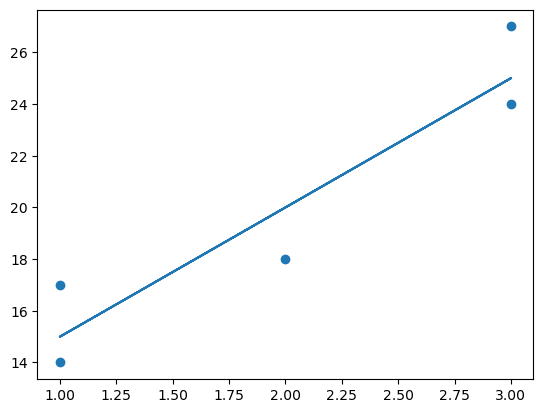

In [30]:
plt.scatter(x,y)
plt.plot(x, lik_model['x'][0] * x + lik_model['x'][1])
plt.show()